# Import packaes

In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy
import scipy.stats
from galpy import potential

# Prepare pretty plotting

In [2]:
#prepare pretty plotting:
from matplotlib import rcParams
from matplotlib.colors import LogNorm
rcParams['font.size'] = 16
rcParams['axes.linewidth'] = 1.5
rcParams['xtick.major.width'] = 1.5
rcParams['xtick.minor.width'] = 1.5
rcParams['ytick.major.width'] = 1.5
rcParams['ytick.minor.width'] = 1.5

#prepare pretty plotting:
figwidth = 6.7
figheight = 5
left = 0.16
bottom = 0.13
plotheight = 0.85
plotwidth = plotheight*figheight/figwidth
cbwidth = 0.04
pad = 0.02

# Read in the test particle simulation & stack snapshots

In [3]:
hdul_start = fits.open('../data/test_particle_simulation/initial_axisymmetric_mockdata_for_test_particle_simulation_EXAMPLE.fits')
tbdata_start = hdul_start[1].data
hdul_start.close()

hdul_end = fits.open('../data/test_particle_simulation/output_barred_test_particle_simulation_EXAMPLE_40kmskpc_m2a01_v0.fits')
tbdata_end = hdul_end[1].data
hdul_end.close()

hdu = fits.BinTableHDU.from_columns(tbdata_start.columns + tbdata_end.columns)
tbdata = hdu.data

In [4]:
number_of_stars       = len(tbdata.field('R_kpc_T10'))
integrations_finished = numpy.sum(numpy.isfinite(tbdata.field('R_kpc_T10')))
print('Number of stars in the simulation   = ',number_of_stars)
print('Number of orbits already integrated = ',integrations_finished)

Number of stars in the simulation   =  100000
Number of orbits already integrated =  8201


In [5]:
R_kpc_end = numpy.array([])
x_kpc_end = numpy.array([])
y_kpc_end = numpy.array([])
z_kpc_end = numpy.array([])
JR_kpckms_end = numpy.array([])
Lz_kpckms_end = numpy.array([])
wR_rad_end = numpy.array([])
wz_rad_end = numpy.array([])
for TX in ['_T20','_T30','_T40','_T50']:
    R_kpc_end = numpy.concatenate((R_kpc_end,tbdata.field('R_kpc'+TX)))
    x_kpc_end = numpy.concatenate((x_kpc_end,tbdata.field('x_kpc'+TX)))
    y_kpc_end = numpy.concatenate((y_kpc_end,tbdata.field('y_kpc'+TX)))
    z_kpc_end = numpy.concatenate((z_kpc_end,tbdata.field('z_kpc'+TX)))
    JR_kpckms_end = numpy.concatenate((JR_kpckms_end,tbdata.field('JR_kpckms'+TX)))
    Lz_kpckms_end = numpy.concatenate((Lz_kpckms_end,tbdata.field('Lz_kpckms'+TX)))
    wR_rad_end = numpy.concatenate((wR_rad_end,tbdata.field('wR_rad'+TX)))
    wz_rad_end = numpy.concatenate((wz_rad_end,tbdata.field('wz_rad'+TX)))

# Potential parameters

In [6]:
# Galpy scale units for the MWPotential2014:
from galpy.potential import MWPotential2014 as pot
_REFR0 = 8.
_REFV0 = 220.

# Pattern speed of bar:
Omega_bar_kmskpc = 40.

# Plots of start vs. end in density

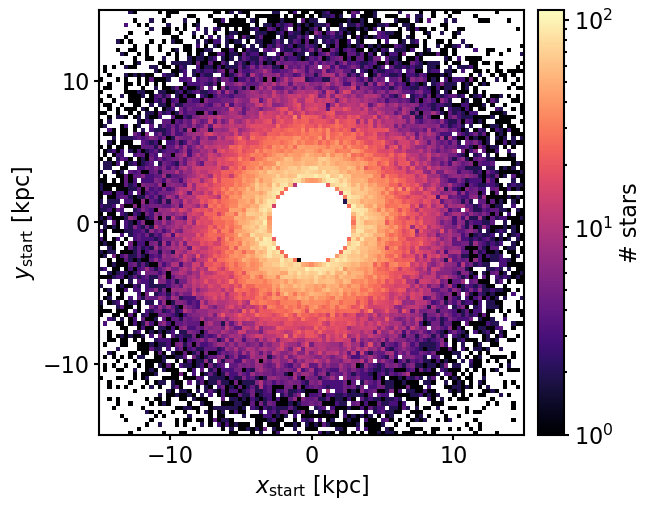

In [7]:
#prepare figure:
fig = plt.figure(figsize=(figwidth,figheight),dpi=100)
ax = fig.add_axes([left,bottom,plotwidth,plotheight])
cax = fig.add_axes([left+plotwidth+pad,bottom,cbwidth,plotheight])

#prepare plotting:
datarange = numpy.array([[-15.,15.],[-15.,15]])
nbins = 101
xarrt = tbdata.field('x_kpc_start')
yarrt = tbdata.field('y_kpc_start')

#plot:
finite = numpy.isfinite(xarrt) * numpy.isfinite(yarrt)
statistic, x_edge, y_edge, binnumber = scipy.stats.binned_statistic_2d(
                                        xarrt[finite], yarrt[finite], None, 
                                        statistic='count', bins=nbins, range=datarange)
im = ax.imshow(statistic.T, cmap='magma',norm=LogNorm(),
   origin='lower',aspect='auto',
   extent=(x_edge[0],x_edge[-1],y_edge[0],y_edge[-1]))

#colorbar:
cb = plt.colorbar(im,cax=cax)

#labels:
ax.set_xlabel('$x_\mathrm{start}$ [kpc]')
ax.set_ylabel('$y_\mathrm{start}$ [kpc]')
cb.set_label('# stars')

#axes:
ax.set_xlim(datarange[0])
ax.set_ylim(datarange[1])
#ax.set_aspect('equal')
ax.locator_params(axis='x', nbins=5)
ax.locator_params(axis='y', nbins=5)

#annotations:

#format:
cb.outline.set_linewidth(1.5)
cb.ax.tick_params(width=1.5)

#save:
#plt.savefig('../figs/template.png')
plt.show()

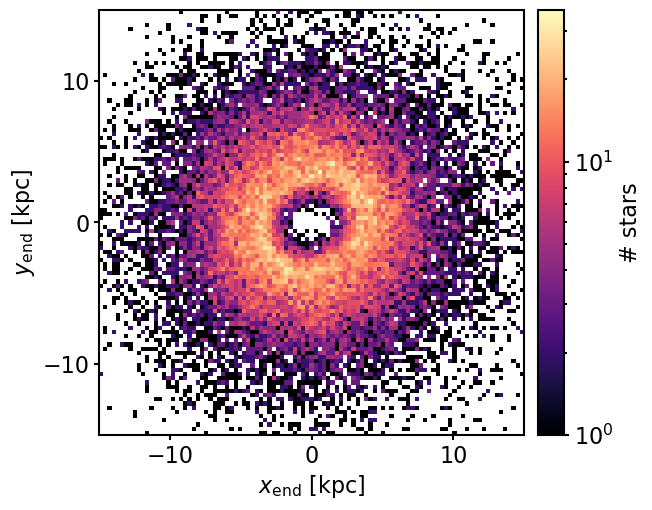

In [8]:
#prepare figure:
fig = plt.figure(figsize=(figwidth,figheight),dpi=100)
ax = fig.add_axes([left,bottom,plotwidth,plotheight])
cax = fig.add_axes([left+plotwidth+pad,bottom,cbwidth,plotheight])

#prepare plotting:
datarange = numpy.array([[-15.,15.],[-15.,15]])
nbins = 101
xarrt = x_kpc_end.copy()
yarrt = y_kpc_end.copy()

#plot:
finite = numpy.isfinite(xarrt) * numpy.isfinite(yarrt)
statistic, x_edge, y_edge, binnumber = scipy.stats.binned_statistic_2d(
                                        xarrt[finite], yarrt[finite], None, 
                                        statistic='count', bins=nbins, range=datarange)
im = ax.imshow(statistic.T, cmap='magma',norm=LogNorm(),
   origin='lower',aspect='auto',
   extent=(x_edge[0],x_edge[-1],y_edge[0],y_edge[-1]))

#colorbar:
cb = plt.colorbar(im,cax=cax)

#labels:
ax.set_xlabel('$x_\mathrm{end}$ [kpc]')
ax.set_ylabel('$y_\mathrm{end}$ [kpc]')
cb.set_label('# stars')

#axes:
ax.set_xlim(datarange[0])
ax.set_ylim(datarange[1])
#ax.set_aspect('equal')
ax.locator_params(axis='x', nbins=5)
ax.locator_params(axis='y', nbins=5)

#annotations:

#format:
cb.outline.set_linewidth(1.5)
cb.ax.tick_params(width=1.5)

#save:
#plt.savefig('../figs/template.png')
plt.show()

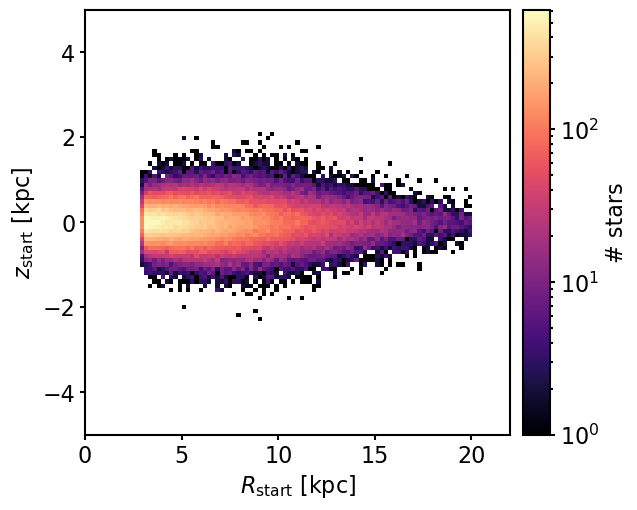

In [9]:
#prepare figure:
fig = plt.figure(figsize=(figwidth,figheight),dpi=100)
ax = fig.add_axes([left,bottom,plotwidth,plotheight])
cax = fig.add_axes([left+plotwidth+pad,bottom,cbwidth,plotheight])

#prepare plotting:
datarange = numpy.array([[0.,22.],[-5.,+5.]])
nbins = 101
xarrt = tbdata.field('R_kpc_start')
yarrt = tbdata.field('z_kpc_start')

#plot:
finite = numpy.isfinite(xarrt) * numpy.isfinite(yarrt)
statistic, x_edge, y_edge, binnumber = scipy.stats.binned_statistic_2d(
                                        xarrt[finite], yarrt[finite], None, 
                                        statistic='count', bins=nbins, range=datarange)
im = ax.imshow(statistic.T, cmap='magma',norm=LogNorm(),
   origin='lower',aspect='auto',
   extent=(x_edge[0],x_edge[-1],y_edge[0],y_edge[-1]))

#colorbar:
cb = plt.colorbar(im,cax=cax)

#labels:
ax.set_xlabel('$R_\mathrm{start}$ [kpc]')
ax.set_ylabel('$z_\mathrm{start}$ [kpc]')
cb.set_label('# stars')

#axes:
ax.set_xlim(datarange[0])
ax.set_ylim(datarange[1])
#ax.set_aspect('equal')
ax.locator_params(axis='x', nbins=5)
ax.locator_params(axis='y', nbins=5)

#annotations:

#format:
cb.outline.set_linewidth(1.5)
cb.ax.tick_params(width=1.5)

#save:
#plt.savefig('../figs/template.png')
plt.show()

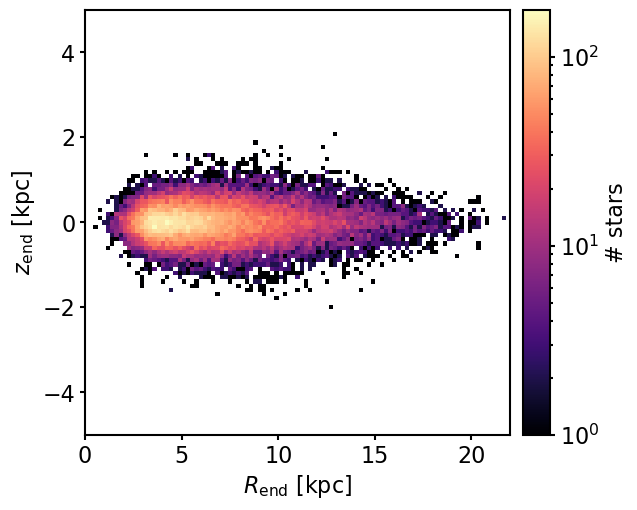

In [10]:
#prepare figure:
fig = plt.figure(figsize=(figwidth,figheight),dpi=100)
ax = fig.add_axes([left,bottom,plotwidth,plotheight])
cax = fig.add_axes([left+plotwidth+pad,bottom,cbwidth,plotheight])

#prepare plotting:
datarange = numpy.array([[0.,22.],[-5.,+5.]])
nbins = 101
xarrt = R_kpc_end.copy()
yarrt = z_kpc_end.copy()

#plot:
finite = numpy.isfinite(xarrt) * numpy.isfinite(yarrt)
statistic, x_edge, y_edge, binnumber = scipy.stats.binned_statistic_2d(
                                        xarrt[finite], yarrt[finite], None, 
                                        statistic='count', bins=nbins, range=datarange)
im = ax.imshow(statistic.T, cmap='magma',norm=LogNorm(),
   origin='lower',aspect='auto',
   extent=(x_edge[0],x_edge[-1],y_edge[0],y_edge[-1]))

#colorbar:
cb = plt.colorbar(im,cax=cax)

#labels:
ax.set_xlabel('$R_\mathrm{end}$ [kpc]')
ax.set_ylabel('$z_\mathrm{end}$ [kpc]')
cb.set_label('# stars')

#axes:
ax.set_xlim(datarange[0])
ax.set_ylim(datarange[1])
#ax.set_aspect('equal')
ax.locator_params(axis='x', nbins=5)
ax.locator_params(axis='y', nbins=5)

#annotations:

#format:
cb.outline.set_linewidth(1.5)
cb.ax.tick_params(width=1.5)

#save:
#plt.savefig('../figs/template.png')
plt.show()

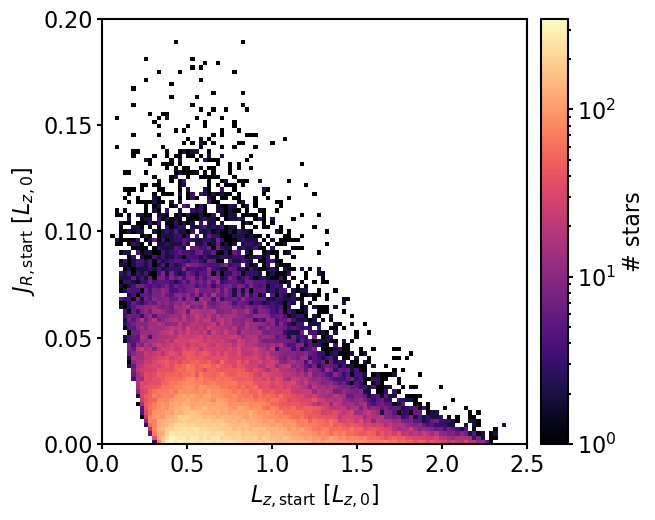

In [11]:
#prepare figure:
fig = plt.figure(figsize=(figwidth,figheight),dpi=100)
ax = fig.add_axes([left,bottom,plotwidth,plotheight])
cax = fig.add_axes([left+plotwidth+pad,bottom,cbwidth,plotheight])

#prepare plotting:
datarange = numpy.array([[0.,2.5],[0.,0.2]])
nbins = 101
xarrt = tbdata.field('Lz_kpckms_start')/_REFR0/_REFV0
yarrt = tbdata.field('JR_kpckms_start')/_REFR0/_REFV0

#plot:
finite = numpy.isfinite(xarrt) * numpy.isfinite(yarrt)
statistic, x_edge, y_edge, binnumber = scipy.stats.binned_statistic_2d(
                                        xarrt[finite], yarrt[finite], None, 
                                        statistic='count', bins=nbins, range=datarange)
im = ax.imshow(statistic.T, cmap='magma',norm=LogNorm(),
   origin='lower',aspect='auto',
   extent=(x_edge[0],x_edge[-1],y_edge[0],y_edge[-1]))

#colorbar:
cb = plt.colorbar(im,cax=cax)

#labels:
ax.set_xlabel(r'$L_{z,\mathrm{start}}$ [$L_{z,0}$]')
ax.set_ylabel(r'$J_{R,\mathrm{start}}$ [$L_{z,0}$]')
cb.set_label('# stars')

#axes:
ax.set_xlim(datarange[0])
ax.set_ylim(datarange[1])
#ax.set_aspect('equal')
ax.locator_params(axis='x', nbins=5)
ax.locator_params(axis='y', nbins=5)

#annotations:

#format:
cb.outline.set_linewidth(1.5)
cb.ax.tick_params(width=1.5)

#save:
#plt.savefig('../figs/template.png')
plt.show()

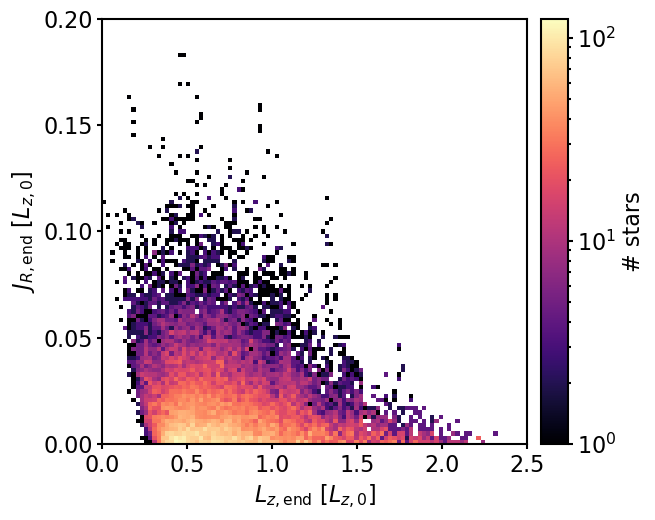

In [12]:
#prepare figure:
fig = plt.figure(figsize=(figwidth,figheight),dpi=100)
ax = fig.add_axes([left,bottom,plotwidth,plotheight])
cax = fig.add_axes([left+plotwidth+pad,bottom,cbwidth,plotheight])

#prepare plotting:
datarange = numpy.array([[0.,2.5],[0.,0.2]])
nbins = 101
xarrt = Lz_kpckms_end/_REFR0/_REFV0
yarrt = JR_kpckms_end/_REFR0/_REFV0

#plot:
finite = numpy.isfinite(xarrt) * numpy.isfinite(yarrt)
statistic, x_edge, y_edge, binnumber = scipy.stats.binned_statistic_2d(
                                        xarrt[finite], yarrt[finite], None, 
                                        statistic='count', bins=nbins, range=datarange)
im = ax.imshow(statistic.T, cmap='magma',norm=LogNorm(),
   origin='lower',aspect='auto',
   extent=(x_edge[0],x_edge[-1],y_edge[0],y_edge[-1]))

#colorbar:
cb = plt.colorbar(im,cax=cax)

#labels:
ax.set_xlabel(r'$L_{z,\mathrm{end}}$ [$L_{z,0}$]')
ax.set_ylabel(r'$J_{R,\mathrm{end}}$ [$L_{z,0}$]')
cb.set_label('# stars')

#axes:
ax.set_xlim(datarange[0])
ax.set_ylim(datarange[1])
#ax.set_aspect('equal')
ax.locator_params(axis='x', nbins=5)
ax.locator_params(axis='y', nbins=5)

#annotations:

#format:
cb.outline.set_linewidth(1.5)
cb.ax.tick_params(width=1.5)

#save:
#plt.savefig('../figs/template.png')
plt.show()

# Overplot resonant stars (select using resonance condition)

In [13]:
#_____1:2 OLR_____
ll,mm = 1.,2.
resonance_condition = mm*(tbdata.field('fund_OmegaT_kmskpc')-Omega_bar_kmskpc) + \
                      ll*tbdata.field('fund_OmegaR_kmskpc')
take_OLR = (numpy.fabs(resonance_condition) < 0.02) * (tbdata.field('fund_OmegaR_kmskpc') > 15.)
take_OLR_tile = numpy.tile(take_OLR,4)

#_____CR_____
resonance_condition = tbdata.field('fund_OmegaT_kmskpc')-Omega_bar_kmskpc
take_CR = (numpy.fabs(resonance_condition) < 0.02)  * (tbdata.field('fund_OmegaR_kmskpc') > 15.)
take_CR_tile = numpy.tile(take_CR,4)

#_____1:1 OLR_____
ll,mm = 1.,1.
resonance_condition = mm*(tbdata.field('fund_OmegaT_kmskpc')-Omega_bar_kmskpc) + \
                      ll*tbdata.field('fund_OmegaR_kmskpc') 
take_11 = (numpy.fabs(resonance_condition) < 0.02)  * (tbdata.field('fund_OmegaR_kmskpc') > 15.)
take_11_tile = numpy.tile(take_11,4)

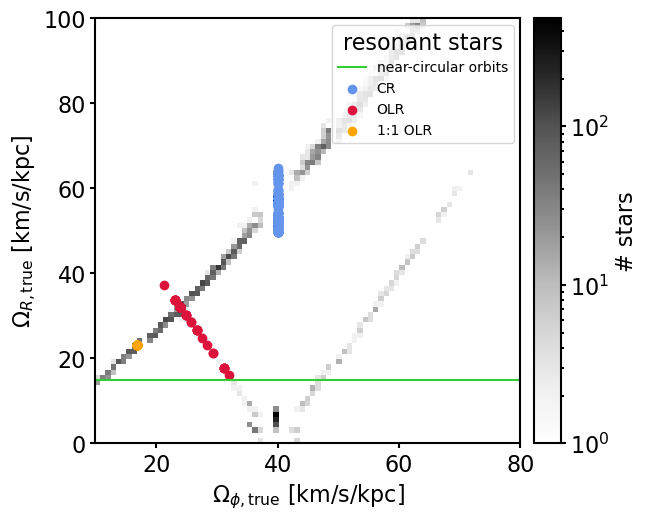

In [14]:
#prepare figure:
fig = plt.figure(figsize=(figwidth,figheight),dpi=100)
ax = fig.add_axes([left,bottom,plotwidth,plotheight])
cax = fig.add_axes([left+plotwidth+pad,bottom,cbwidth,plotheight])

#prepare plotting:
datarange = numpy.array([[10.,80.],[0.,100.]])
nbins = 81
xarrt = tbdata.field('fund_OmegaT_kmskpc')
yarrt = tbdata.field('fund_OmegaR_kmskpc')

#plot:
finite = numpy.isfinite(xarrt) * numpy.isfinite(yarrt)
statistic, x_edge, y_edge, binnumber = scipy.stats.binned_statistic_2d(
                                        xarrt[finite], yarrt[finite], None, 
                                        statistic='count', bins=nbins, range=datarange)
im = ax.imshow(statistic.T, cmap='Greys',norm=LogNorm(),
   origin='lower',aspect='auto',
   extent=(x_edge[0],x_edge[-1],y_edge[0],y_edge[-1]))

#colorbar:
cb = plt.colorbar(im,cax=cax)

#labels:
ax.set_xlabel('$\Omega_{\phi,\mathrm{true}}$ [km/s/kpc]')
ax.set_ylabel('$\Omega_{R,\mathrm{true}}$ [km/s/kpc]')
cb.set_label('# stars')

#axes:
ax.set_xlim(datarange[0])
ax.set_ylim(datarange[1])
#ax.set_aspect('equal')
ax.locator_params(axis='x', nbins=5)
ax.locator_params(axis='y', nbins=5)

#annotations:
ax.scatter(xarrt[take_CR],yarrt[take_CR]  ,color='cornflowerblue',label='CR')
ax.scatter(xarrt[take_OLR],yarrt[take_OLR],color='crimson',label='OLR')
ax.scatter(xarrt[take_11],yarrt[take_11]  ,color='orange',label='1:1 OLR')
ax.axhline(15.,color='limegreen',label='near-circular orbits')
ax.legend(title='resonant stars',fontsize=10)

#format:
cb.outline.set_linewidth(1.5)
cb.ax.tick_params(width=1.5)

#save:
#plt.savefig('../figs/template.png')
plt.show()

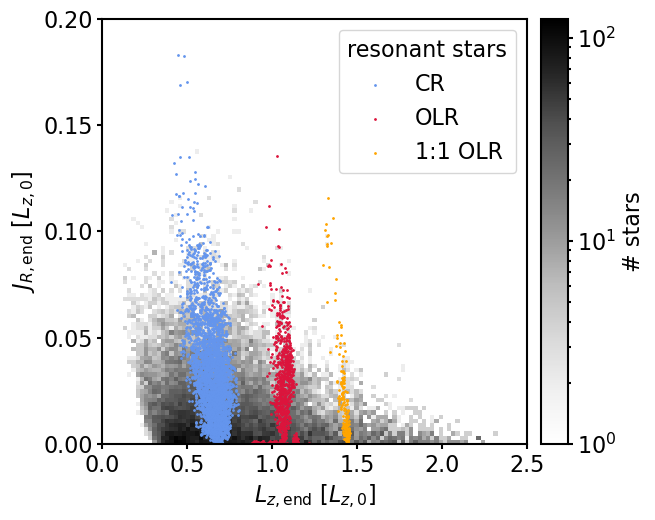

In [15]:
#prepare figure:
fig = plt.figure(figsize=(figwidth,figheight),dpi=100)
ax = fig.add_axes([left,bottom,plotwidth,plotheight])
cax = fig.add_axes([left+plotwidth+pad,bottom,cbwidth,plotheight])

#prepare plotting:
datarange = numpy.array([[0.,2.5],[0.,0.2]])
nbins = 101
xarrt = Lz_kpckms_end/_REFR0/_REFV0
yarrt = JR_kpckms_end/_REFR0/_REFV0

#plot:
finite = numpy.isfinite(xarrt) * numpy.isfinite(yarrt)
statistic, x_edge, y_edge, binnumber = scipy.stats.binned_statistic_2d(
                                        xarrt[finite], yarrt[finite], None, 
                                        statistic='count', bins=nbins, range=datarange)
im = ax.imshow(statistic.T, cmap='Greys',norm=LogNorm(),
   origin='lower',aspect='auto',
   extent=(x_edge[0],x_edge[-1],y_edge[0],y_edge[-1]))

#colorbar:
cb = plt.colorbar(im,cax=cax)

#labels:
ax.set_xlabel(r'$L_{z,\mathrm{end}}$ [$L_{z,0}$]')
ax.set_ylabel(r'$J_{R,\mathrm{end}}$ [$L_{z,0}$]')
cb.set_label('# stars')

#axes:
ax.set_xlim(datarange[0])
ax.set_ylim(datarange[1])
#ax.set_aspect('equal')
ax.locator_params(axis='x', nbins=5)
ax.locator_params(axis='y', nbins=5)

#annotations:
ax.scatter(xarrt[take_CR_tile],yarrt[take_CR_tile]  ,s=1,color='cornflowerblue',label='CR')
ax.scatter(xarrt[take_OLR_tile],yarrt[take_OLR_tile],s=1,color='crimson',label='OLR')
ax.scatter(xarrt[take_11_tile],yarrt[take_11_tile]  ,s=1,color='orange',label='1:1 OLR')
ax.legend(title='resonant stars')

#format:
cb.outline.set_linewidth(1.5)
cb.ax.tick_params(width=1.5)

#save:
#plt.savefig('../figs/template.png')
plt.show()

# Sampling artifacts at the edges of the disk

In [16]:
# by-eye estimated boundaries of phase-mixed region:
Lz_min = 0.5
Lz_max = 2.1

# corresponding guiding-center radius:
Rmin_kpc = potential.rl(pot,Lz_min)*_REFR0
Rmax_kpc = potential.rl(pot,Lz_max)*_REFR0

Red  = (|wR| ~ +/-pi) = mostly at apo-center
Blue = (|wR| ~ 0    ) = mostly at peri-center
Green = mostly phase-mixed


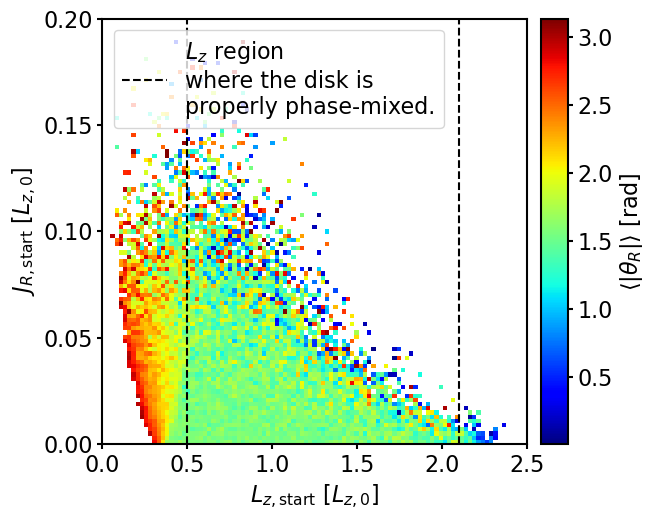

In [17]:
#prepare figure:
fig = plt.figure(figsize=(figwidth,figheight),dpi=100)
ax = fig.add_axes([left,bottom,plotwidth,plotheight])
cax = fig.add_axes([left+plotwidth+pad,bottom,cbwidth,plotheight])

#prepare plotting:
datarange = numpy.array([[0.,2.5],[0.,0.2]])
nbins = 101
xarrt = tbdata.field('Lz_kpckms_start')/_REFR0/_REFV0
yarrt = tbdata.field('JR_kpckms_start')/_REFR0/_REFV0
zarrt = numpy.fabs(tbdata.field('wR_rad_start'))

#plot:
finite = numpy.isfinite(xarrt) * numpy.isfinite(yarrt)
statistic, x_edge, y_edge, binnumber = scipy.stats.binned_statistic_2d(
                                        xarrt[finite], yarrt[finite], zarrt[finite], 
                                        statistic='mean', bins=nbins, range=datarange)
im = ax.imshow(statistic.T, cmap='jet',
   origin='lower',aspect='auto',
   extent=(x_edge[0],x_edge[-1],y_edge[0],y_edge[-1]))

#colorbar:
cb = plt.colorbar(im,cax=cax)
print('Red  = (|wR| ~ +/-pi) = mostly at apo-center')
print('Blue = (|wR| ~ 0    ) = mostly at peri-center')
print('Green = mostly phase-mixed')

#labels:
ax.set_xlabel(r'$L_{z,\mathrm{start}}$ [$L_{z,0}$]')
ax.set_ylabel(r'$J_{R,\mathrm{start}}$ [$L_{z,0}$]')
cb.set_label(r'$\langle |\theta_R| \rangle$ [rad]')

#axes:
ax.set_xlim(datarange[0])
ax.set_ylim(datarange[1])
#ax.set_aspect('equal')
ax.locator_params(axis='x', nbins=5)
ax.locator_params(axis='y', nbins=5)

#annotations:
ax.axvline(Lz_min,color='k',linestyle='dashed')
ax.axvline(Lz_max,color='k',linestyle='dashed',label='$L_z$ region\nwhere the disk is\nproperly phase-mixed.')
ax.legend()

#format:
cb.outline.set_linewidth(1.5)
cb.ax.tick_params(width=1.5)

#save:
#plt.savefig('../figs/template.png')
plt.show()

Red   = (|wR| ~ +/-pi) = mostly at apo-center
Blue  = (|wR| ~ 0    ) = mostly at peri-center
Green = mostly phase-mixed


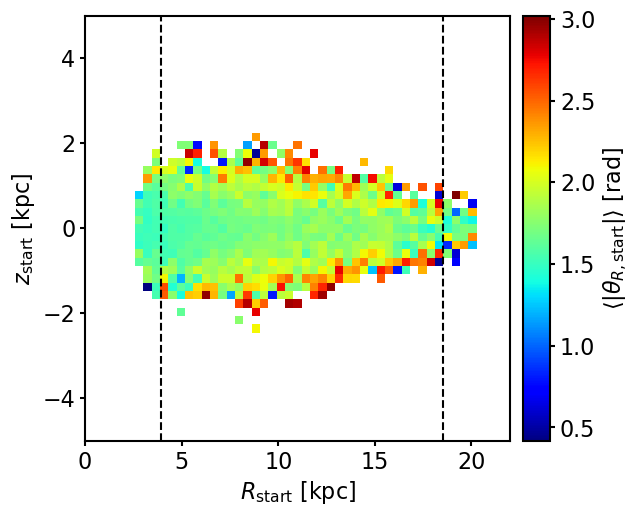

In [18]:
#prepare figure:
fig = plt.figure(figsize=(figwidth,figheight),dpi=100)
ax = fig.add_axes([left,bottom,plotwidth,plotheight])
cax = fig.add_axes([left+plotwidth+pad,bottom,cbwidth,plotheight])

#prepare plotting:
datarange = numpy.array([[0.,22.],[-5.,5.]])
nbins = 51
xarrt = tbdata.field('R_kpc_start')
yarrt = tbdata.field('z_kpc_start')
zarrt = numpy.fabs(tbdata.field('wR_rad_start'))

#plot:
finite = numpy.isfinite(xarrt) * numpy.isfinite(yarrt)
statistic, x_edge, y_edge, binnumber = scipy.stats.binned_statistic_2d(
                                        xarrt[finite], yarrt[finite], zarrt[finite], 
                                        statistic='mean', bins=nbins, range=datarange)
im = ax.imshow(statistic.T, cmap='jet',
   origin='lower',aspect='auto',
   extent=(x_edge[0],x_edge[-1],y_edge[0],y_edge[-1]))

#colorbar:
cb = plt.colorbar(im,cax=cax)
print('Red   = (|wR| ~ +/-pi) = mostly at apo-center')
print('Blue  = (|wR| ~ 0    ) = mostly at peri-center')
print('Green = mostly phase-mixed')

#labels:
ax.set_xlabel(r'$R_\mathrm{start}$ [kpc]')
ax.set_ylabel(r'$z_\mathrm{start}$ [kpc]')
cb.set_label(r'$\langle |\theta_{R,\mathrm{start}}| \rangle$ [rad]')

#axes:
ax.set_xlim(datarange[0])
ax.set_ylim(datarange[1])
#ax.set_aspect('equal')
ax.locator_params(axis='x', nbins=5)
ax.locator_params(axis='y', nbins=5)

#annotations:
ax.axvline(Rmin_kpc,color='k',linestyle='dashed')
ax.axvline(Rmax_kpc,color='k',linestyle='dashed')

#format:
cb.outline.set_linewidth(1.5)
cb.ax.tick_params(width=1.5)

#save:
#plt.savefig('../figs/template.png')
plt.show()

Red   = (|wR| ~ +/-pi) = mostly at apo-center
Blue  = (|wR| ~ 0    ) = mostly at peri-center
Green = mostly phase-mixed


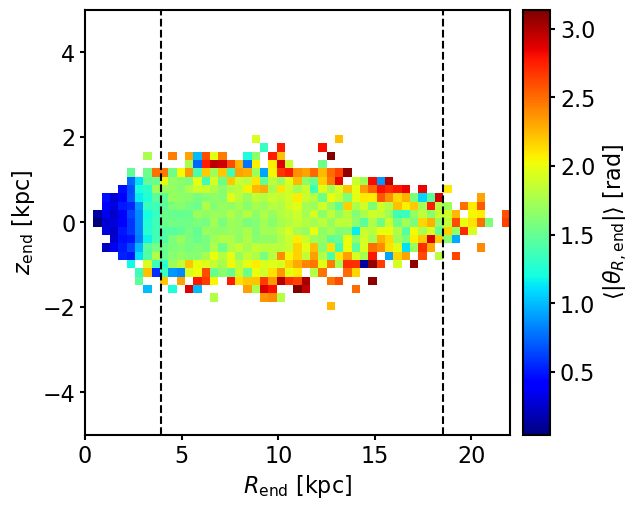

In [19]:
#prepare figure:
fig = plt.figure(figsize=(figwidth,figheight),dpi=100)
ax = fig.add_axes([left,bottom,plotwidth,plotheight])
cax = fig.add_axes([left+plotwidth+pad,bottom,cbwidth,plotheight])

#prepare plotting:
datarange = numpy.array([[0.,22.],[-5.,5.]])
nbins = 51
xarrt = R_kpc_end.copy()
yarrt = z_kpc_end.copy()
zarrt = numpy.fabs(wR_rad_end)

#plot:
finite = numpy.isfinite(xarrt) * numpy.isfinite(yarrt)
statistic, x_edge, y_edge, binnumber = scipy.stats.binned_statistic_2d(
                                        xarrt[finite], yarrt[finite], zarrt[finite], 
                                        statistic='mean', bins=nbins, range=datarange)
im = ax.imshow(statistic.T, cmap='jet',
   origin='lower',aspect='auto',
   extent=(x_edge[0],x_edge[-1],y_edge[0],y_edge[-1]))

#colorbar:
cb = plt.colorbar(im,cax=cax)
print('Red   = (|wR| ~ +/-pi) = mostly at apo-center')
print('Blue  = (|wR| ~ 0    ) = mostly at peri-center')
print('Green = mostly phase-mixed')

#labels:
ax.set_xlabel(r'$R_\mathrm{end}$ [kpc]')
ax.set_ylabel(r'$z_\mathrm{end}$ [kpc]')
cb.set_label(r'$\langle |\theta_{R,\mathrm{end}}| \rangle$ [rad]')

#axes:
ax.set_xlim(datarange[0])
ax.set_ylim(datarange[1])
#ax.set_aspect('equal')
ax.locator_params(axis='x', nbins=5)
ax.locator_params(axis='y', nbins=5)

#annotations:
ax.axvline(Rmin_kpc,color='k',linestyle='dashed')
ax.axvline(Rmax_kpc,color='k',linestyle='dashed')

#format:
cb.outline.set_linewidth(1.5)
cb.ax.tick_params(width=1.5)

#save:
#plt.savefig('../figs/template.png')
plt.show()

Red   = (|wz| ~ +/-pi) = mostly at |zmax| away from the plane
Blue  = (|wz| ~ 0    ) = in the mid-plane
Green = mostly phase-mixed


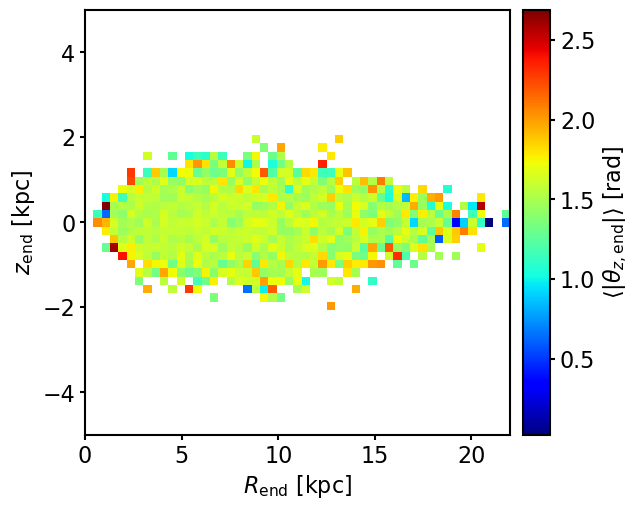

In [20]:
#prepare figure:
fig = plt.figure(figsize=(figwidth,figheight),dpi=100)
ax = fig.add_axes([left,bottom,plotwidth,plotheight])
cax = fig.add_axes([left+plotwidth+pad,bottom,cbwidth,plotheight])

#prepare plotting:
datarange = numpy.array([[0.,22.],[-5.,5.]])
nbins = 51
xarrt = R_kpc_end.copy()
yarrt = z_kpc_end.copy()
zarrt = numpy.fabs(wz_rad_end)

#plot:
finite = numpy.isfinite(xarrt) * numpy.isfinite(yarrt)
statistic, x_edge, y_edge, binnumber = scipy.stats.binned_statistic_2d(
                                        xarrt[finite], yarrt[finite], zarrt[finite], 
                                        statistic='mean', bins=nbins, range=datarange)
im = ax.imshow(statistic.T, cmap='jet',
   origin='lower',aspect='auto',
   extent=(x_edge[0],x_edge[-1],y_edge[0],y_edge[-1]))

#colorbar:
cb = plt.colorbar(im,cax=cax)
print('Red   = (|wz| ~ +/-pi) = mostly at |zmax| away from the plane')
print('Blue  = (|wz| ~ 0    ) = in the mid-plane')
print('Green = mostly phase-mixed')

#labels:
ax.set_xlabel(r'$R_\mathrm{end}$ [kpc]')
ax.set_ylabel(r'$z_\mathrm{end}$ [kpc]')
cb.set_label(r'$\langle |\theta_{z,\mathrm{end}}| \rangle$ [rad]')

#axes:
ax.set_xlim(datarange[0])
ax.set_ylim(datarange[1])
#ax.set_aspect('equal')
ax.locator_params(axis='x', nbins=5)
ax.locator_params(axis='y', nbins=5)

#annotations:

#format:
cb.outline.set_linewidth(1.5)
cb.ax.tick_params(width=1.5)

#save:
#plt.savefig('../figs/template.png')
plt.show()